<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#How-many-people-survived?" data-toc-modified-id="How-many-people-survived?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many people survived?</a></span></li><li><span><a href="#How-many-children-were-on-board?-Did-they-have-a-higher-survival-rate-than-adults?" data-toc-modified-id="How-many-children-were-on-board?-Did-they-have-a-higher-survival-rate-than-adults?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How many children were on board? Did they have a higher survival rate than adults?</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Hypothesis

Children (passengers 18 years or younger) had the highest survival rate of all passengers in the Titanic disater. 

## Load data

In [28]:
titanic = pd.read_csv("../../data/titanic.csv")

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Get info

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Find number of NaN values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many people survived?

In [7]:
print("{} out of {} people survived.".format(titanic['Survived'].sum(), len(titanic)))

342 out of 891 people survived.


In [8]:
# Calculate survival rate

titanic['Survived'].sum() / len(titanic)

0.3838383838383838

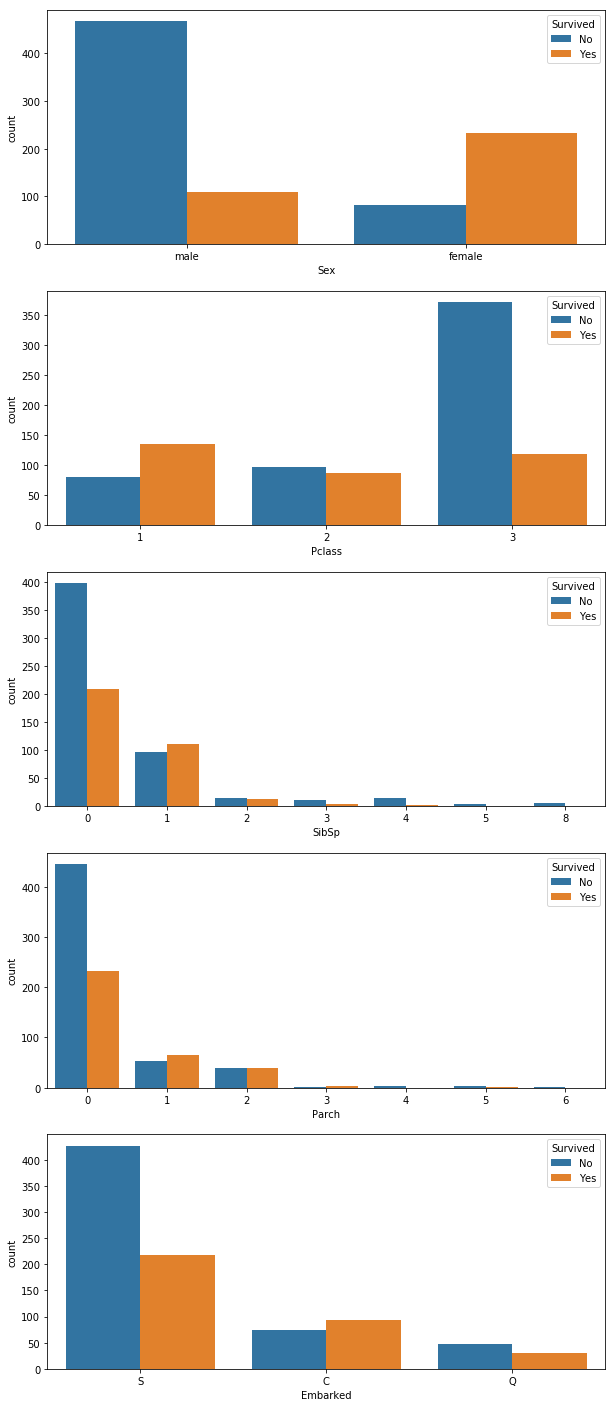

In [21]:
# Plot number of survivors by category

fig = plt.figure(figsize=(10, 25))

for i, var in enumerate(['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']):
    ax = fig.add_subplot(len(['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']), 1, i+1)
    sns.countplot(x=var, hue='Survived', data=titanic, ax=ax)
    ax.legend(loc="upper right", title="Survived", labels=["No", "Yes"])
    
plt.show()    

Interesting points:
 - A typical passenger is male in 3rd class who embarked in Southampton and has no sibling/spouse or parent/child on board 
 - Survivors are mostly female
 - Higher proportion of 1st class passengers survived
 - Almost 3 times the number of 3rd class passengers died vs. 3rd class passengers survived
 - Twice the number of people with no sibling/spouse or with a parent/child on board died vs. those who survived

## How many children were on board? Did they have a higher survival rate than adults?

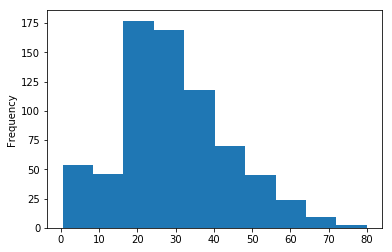

In [23]:
# Plot distribution of age

titanic['Age'].plot.hist()

In [45]:
titanic.groupby('Age_bin').size().index.astype(str).tolist()

['(0, 10]',
 '(10, 20]',
 '(20, 30]',
 '(30, 40]',
 '(40, 50]',
 '(50, 60]',
 '(60, 70]',
 '(70, 80]',
 '(80, 90]']

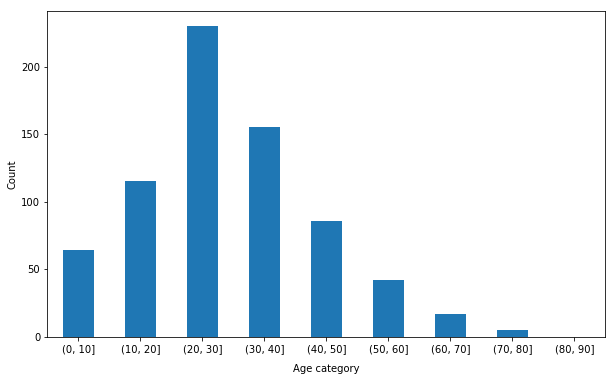

In [50]:
# Categorise age by 10-year intervals

titanic['Age_bin'] = pd.cut(titanic['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
age_bin = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]

titanic.groupby('Age_bin').size().plot.bar(figsize=(10, 6))
plt.xticks(rotation=0)
plt.xlabel("Age category", labelpad=10)
plt.ylabel("Count")

plt.show()

In [52]:
# Calculate number of passengers 18 years old or less 

len(titanic[titanic['Age'] <= 18])

139

In [54]:
# Create binary child column: child == 1

titanic['Child'] = titanic['Age'].apply(lambda x: 1 if x <= 18 else 0)

# Create age label

titanic['Age_label'] = titanic['Age'].apply(lambda x: 'Child' if x <= 18 else 'Adult')

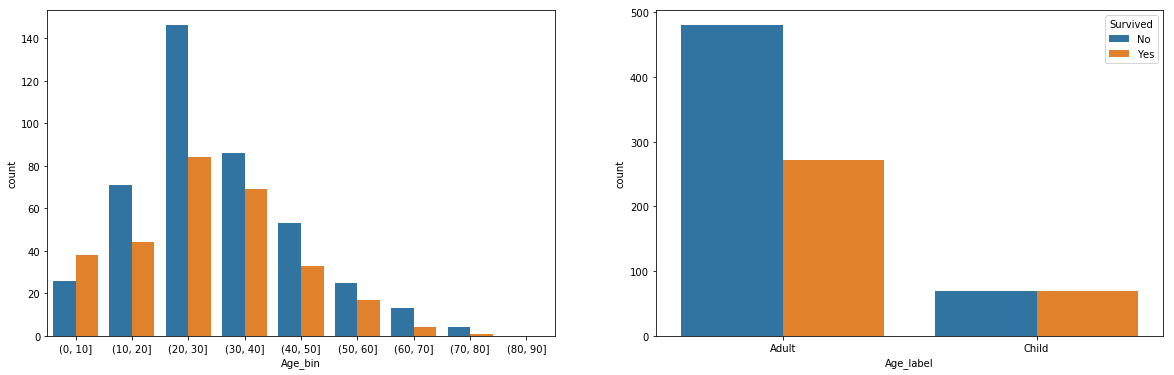

In [65]:
# Now plot survivors by age

fig = plt.figure(figsize=(20, 6))

for i, var in enumerate(['Age_bin', 'Age_label']):
    ax = fig.add_subplot(1, 2, i+1)
    sns.countplot(x=var, hue='Survived', data=titanic, ax=ax)
    ax.legend(title="Survived", labels=["No", "Yes"], loc="upper right")
    
    # Hide legend from left plot
    if i == 0:
        ax.get_legend().remove()

plt.show()

In [75]:
# Calculate child survival 

child_survive = len(titanic[(titanic['Age_label'] == 'Child') & (titanic['Survived'] == 1)])
adult_survive
sum_child = len(titanic[(titanic['Age_label'] == 'Child')])
all_survive = len(titanic[(titanic['Survived'] == 1)])
sum_passengers = len(titanic)

In [77]:
print("{}% of passengers are 18 years old or younger".format(round(sum_child / sum_passengers * 100), 1))
print("{}% of survivors are 18 years old or younger".format(round(child_survive / all_survive * 100, 1)))
print("{}% of passengers 18 years or younger survived".format(round(child_survive / sum_child * 100, 1)))

16% of passengers are 18 years old or younger
20.5% of survivors are 18 years old or younger
50.4% of passengers 18 years or younger survived
